# Electrocardiograms

👇 Import the [`electrocardiograms.csv`](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_dataset.csv) dataset and display its first 5 row

In [1]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_dataset.csv")

data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
0,0.000000,0.041199,0.112360,0.146067,0.202247,0.322097,0.363296,0.413858,0.426966,0.485019,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.000000,0.901786,0.760714,0.610714,0.466071,0.385714,0.364286,0.346429,0.314286,0.305357,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.994200,1.000000,0.951276,0.903712,0.917633,0.900232,0.803944,0.656613,0.421114,0.288863,...,0.294664,0.295824,0.301624,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.984472,0.962733,0.663043,0.211180,0.000000,0.032609,0.100932,0.177019,0.270186,0.313665,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.619217,0.489324,0.327402,0.110320,0.000000,0.060498,0.108541,0.108541,0.145907,0.192171,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


ℹ️ Each obervation of the dataset is a numerically represented heartbeat, taken from a patient's electrocardiogram (ECG). The target is binary and defines whether the heartbeat is at risk of cardiovascular disease [1] or not [0]. 

# Data Exploration

👇 Plot an observation of each target class to get a visual idea of what the numbers represent.

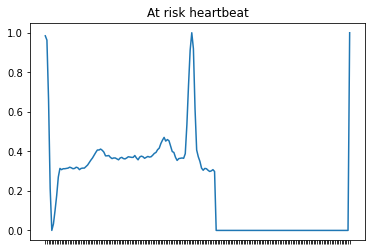

In [2]:
import matplotlib.pyplot as plt

plt.plot(data.iloc[3])
plt.tick_params(labelbottom=False)
plt.title('At risk heartbeat')
plt.show()

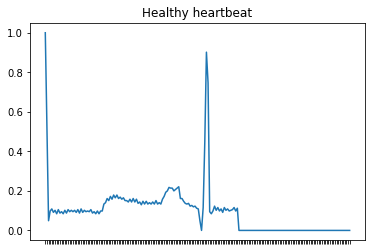

In [3]:
plt.plot(data.iloc[19560])
plt.tick_params(labelbottom=False)
plt.title('Healthy heartbeat')
plt.show()

👇 How many observations of at-risk heartbeats are there? Save your answer as `at_risk_count`.

In [4]:
at_risk_count = data.target.value_counts()[1]
at_risk_count

1448

👇 How many observations of healthy heartbeats are there? Save your answer as `healthy_count`.

In [5]:
healthy_count = data.target.value_counts()[0]
healthy_count

18117

ℹ️ In certain cases, the class balance is representative of the true class distribution. This is the case here: the vast majority of people actually have healthy hearts. In such case, we preserve the class distribution inform the model on the reality, and adapt our modelling approach accordingly.

### ☑️ Check your code

In [6]:
from nbresult import ChallengeResult

result = ChallengeResult('class_balance',
                         healthy = healthy_count,
                         at_risk = at_risk_count)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/nandosoq/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nandosoq/code/Nandosoq/data-challenges/05-ML/03-Performance-metrics/02-Electrocardiograms
plugins: anyio-3.2.1, dash-1.21.0
collecting ... collected 2 items

tests/test_class_balance.py::TestClass_balance::test_at_risk_count PASSED [ 50%]
tests/test_class_balance.py::TestClass_balance::test_healthy_count PASSED [100%]

============================== 2 passed in 0.12s ===============================


💯 You can commit your code:

git add tests/class_balance.pickle

git commit -m 'Completed class_balance step'

git push origin master


#  Logistic Regression

🎯 Your task is to flag heartbeats that are at risk of cardiovascular diseases.

👇 Let's start by investigating the performance of a `LogisticRegression` on that task. Use cross validation to evaluate the model on the following metrics:
- Accuracy
- Recall
- Precision
- F1

In [7]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Ready X and y
X = data.loc[:, 'x_1':'x_187']
y = data['target']

# 10-Fold Cross validate model
log_cv_results = cross_validate(LogisticRegression(max_iter=1000), X, y, cv=10, 
                            scoring=['accuracy','recall','precision','f1'])

❓ What is the model's ratio of correct predictions? Save your answer under variable name `correct_pred_ratio`.

In [8]:
correct_pred_ratio = log_cv_results['test_accuracy'].mean()

correct_pred_ratio

0.9390746917624634

❓ What percentage of at-risk heartbeats is the model able to flag? Save your answer under variable name `flag_ratio`.

In [9]:
flag_ratio = log_cv_results['test_recall'].mean()

flag_ratio

0.32938697318007665

❓ When the model signals an at-risk heartbeat, how often is it correct? Save your answer under variable name `correct_detection_ratio`.

In [10]:
correct_detection_ratio = log_cv_results['test_precision'].mean()

correct_detection_ratio

0.6832685782552069

❓ What is the model's ability to flag as many at-risk heartbeats as possible while limiting false alarms?  Save your answer under variable name `aggregated_metric`.

In [11]:
aggregated_metric = log_cv_results['test_f1'].mean()

aggregated_metric

0.443460572263365

ℹ️ By observing the different metrics, you should see that accuracy is deceiving. To understand what is going on, we can observe a breakdown of the model's predictions in a confusion matrix.

### ☑️ Check your code

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('logistic_regression_evaluation',
                         accuracy = correct_pred_ratio,
                         recall = flag_ratio,
                         precision = correct_detection_ratio,
                         f1 = aggregated_metric)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/nandosoq/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nandosoq/code/Nandosoq/data-challenges/05-ML/03-Performance-metrics/02-Electrocardiograms
plugins: anyio-3.2.1, dash-1.21.0
collecting ... collected 4 items

tests/test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_accuracy PASSED [ 25%]
tests/test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_f1 PASSED [ 50%]
tests/test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_precision PASSED [ 75%]
tests/test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_recall PASSED [100%]

============================== 4 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/logistic_regression_evaluation.pickle

# Confusion Matrix

👇 Using `plot_confusion_matrix` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)),  visualize the predictions breakdown of the Logistic Regression model.

<details>
<summary>💡 Hints</summary>

- `plot_confusion_matrix` takes as input a **trained model** and **test data**
    
- You'll need to go back to the **Holdout method!** You can use Sklearn's `train_test_split()` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))
    
- Look into the `normalize` parameter
  
</details>



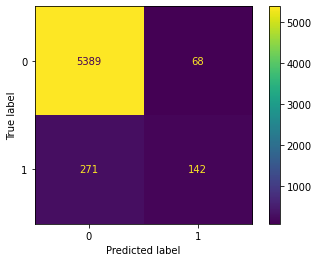

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# Instanciate and train the model on train data
log_model = LogisticRegression(max_iter=1000).fit(X_train,y_train)

# Plot confusion matrix by passing trained model and test data
plot_confusion_matrix(log_model, X_test, y_test)

ℹ️ The confusion matrix should show that the model is influenced by the class imbalance: it predicts heartbeats to be healthy most of the time. Due to this behaviour, the model is often correct and has a high accuracy. However, it causes it to miss out on many at risk heartbeats: it has a bad recall.

👉 This model is therefore poor at the task of **flagging at-risk observations**.

⚠️ Don't be fooled by the accuracy and look at the metric that corresponds to your task! ⚠️

# KNN Classifier

👇 Would a default KNN classifier perform better at the task of flagging at-risk observations?

Save the you answer under `best_model` as "KNN" or "LogisticRegression".

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# 10-Fold Cross validate model and evaluate recall
knn_cv_results = cross_validate(KNeighborsClassifier(n_neighbors=5), X, y, cv=10, 
                            scoring=['recall']) 

knn_score = knn_cv_results['test_recall'].mean()
print(knn_score)

best_model = "KNN"

0.8680507662835248


ℹ️ The KNN classifier should have a much higher recall than the LogisticRegression and therefore is better suited for the task.




### ☑️ Check your code

In [15]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/nandosoq/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nandosoq/code/Nandosoq/data-challenges/05-ML/03-Performance-metrics/02-Electrocardiograms
plugins: anyio-3.2.1, dash-1.21.0
collecting ... collected 1 item

tests/test_best_model.py::TestBest_model::test_best_model PASSED         [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master


# Classification Report

Now that we know the KNN model has the best recall, let's check out its performance accross all the other classification metrics.

👇 Print out a `classification_report` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)) of the KNN model.

<details>
<summary> 💡 Hint  </summary>
    
You'll need to pass model predictions to `classification_report`. Sklearn's `cross_val_predict` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)) might help 😉
</details>




In [16]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=5), X, y) # Make cross validated predictions of entire dataset

print(classification_report(y,y_pred)) # Pass predictions and true values to Classification report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18117
           1       0.94      0.86      0.90      1448

    accuracy                           0.99     19565
   macro avg       0.96      0.93      0.94     19565
weighted avg       0.99      0.99      0.99     19565



❓ Looking at the classification report, what is the model's ratio of correctly predicted at-risk heartbeats? Save your answer as a float under `correct_atrisk_predictions`

In [17]:
correct_atrisk_predictions = 0.94

### ☑️ Check your code

In [18]:
from nbresult import ChallengeResult

result = ChallengeResult('precision',
                         precision = correct_atrisk_predictions)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/nandosoq/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nandosoq/code/Nandosoq/data-challenges/05-ML/03-Performance-metrics/02-Electrocardiograms
plugins: anyio-3.2.1, dash-1.21.0
collecting ... collected 1 item

tests/test_precision.py::TestPrecision::test_precision PASSED            [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/precision.pickle

git commit -m 'Completed precision step'

git push origin master


# Prediction

🎯 A patient comes to you for a second opinion on what he was told may be an at risk heartbeat.  Download its data [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_new_patient.csv).


❓ According to your optimal model, is he at risk or not?  

Save the prediction of your model under variable name `prediction` as "at risk" or "healthy".

In [19]:
new_patient = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Electrocardiograms_new_patient.csv')

new_patient

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_178,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187
0,0.904762,0.993197,1.0,0.956916,0.902494,0.857143,0.802721,0.777778,0.709751,0.557823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
knn_model = KNeighborsClassifier().fit(X,y) # Fit the model you have found to be optimal (Default KNN)

model_prediction = knn_model.predict(new_patient)[0] # Make prediction
print(model_prediction)

prediction = "at risk"

1


### ☑️ Check your code

In [21]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.6, pytest-6.2.4, py-1.10.0, pluggy-0.13.1 -- /home/nandosoq/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/nandosoq/code/Nandosoq/data-challenges/05-ML/03-Performance-metrics/02-Electrocardiograms
plugins: anyio-3.2.1, dash-1.21.0
collecting ... collected 1 item

tests/test_prediction.py::TestPrediction::test_prediction_at_risk PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master


# 🏁